<Font size='4'>**Importing required libraries**</Font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Font size='4'>**Reading CSV Files**</Font>

In [31]:
pd.__version__

'2.2.2'

In [2]:
df=pd.read_csv('./space_missions.csv',encoding_errors='ignore')
df

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


<font size='7'>**Recommended Analysis**</font>

<font size='4'>
    
How have rocket launches trended across time? Has mission success rate increased?

Which countries have had the most successful space missions? Has it always been that way?

Which rocket has been used for the most space missions? Is it still active?

Are there any patterns you can notice with the launch locations?
</font>

# Q.1: Data Cleansing <a id=0></a>

In [3]:
#chacking for null  values present in dataset or not
df[df.isnull().any(axis=1)]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4605,KARI,"LC-2, Naro Space Center, South Korea",2022-06-21,07:00:00,KSLV-2,Test Flight 2,Active,NaN,Success
4610,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand",2022-06-28,09:55:00,Electron/Photon,CAPSTONE,Active,NaN,Success
4621,ESA,"ELV-1, Guiana Space Centre, French Guiana, France",2022-07-13,13:13:00,Vega C,LARES 2 & Cubesats,Active,NaN,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [5]:
df[df['Time'].isnull()]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
13,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-07-25,NaN,NOTS-EV-1 Pilot II,Pilot-1 (D1),Retired,NaN,Failure
15,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-08-12,NaN,NOTS-EV-1 Pilot II,Pilot-2 (D2),Retired,NaN,Failure
17,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-08-22,NaN,NOTS-EV-1 Pilot II,Pilot-3 (D3),Retired,NaN,Failure
19,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-08-25,NaN,NOTS-EV-1 Pilot II,Pilot-4 (R1),Retired,NaN,Failure
20,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-08-26,NaN,NOTS-EV-1 Pilot II,Pilot-5 (R2),Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
3988,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...",2017-07-27,NaN,Simorgh,Test Flight,Active,NaN,Failure
4029,Blue Origin,"Blue Origin Launch Site, West Texas, Texas, USA",2017-12-17,NaN,New Shepard,NS-7,Active,NaN,Success
4161,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...",2019-02-05,NaN,Safir-1B+,Dousti,Active,NaN,Failure
4217,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...",2019-08-29,NaN,Safir-1B+,Nahid-1,Active,NaN,Prelaunch Failure


In [6]:
df.isna().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

In [7]:
#converting price column in int datatype
df['Price']=pd.to_numeric(df['Price'].str.replace(',',' '),errors='coerce')
df['Price']=df['Price'].astype(float)

#fill missing value with avg of price
df['Price']=df['Price'].fillna(df['Price'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4630 non-null   object 
 1   Location       4630 non-null   object 
 2   Date           4630 non-null   object 
 3   Time           4503 non-null   object 
 4   Rocket         4630 non-null   object 
 5   Mission        4630 non-null   object 
 6   RocketStatus   4630 non-null   object 
 7   Price          4630 non-null   float64
 8   MissionStatus  4630 non-null   object 
dtypes: float64(1), object(8)
memory usage: 325.7+ KB


In [4]:
df.isna().sum()

Company            0
Location           0
Date               0
Time             127
Rocket             0
Mission            0
RocketStatus       0
Price              0
MissionStatus      0
dtype: int64

In [8]:
#removing time column
df.drop(columns=['Time'],axis=0,inplace=True)

In [9]:
df['Date']=pd.to_datetime(df['Date'])
#df.info()

In [10]:
#extracting year from date column
df['MissionYear']=df['Date'].dt.year
df

,Company,Location,Date,Rocket,Mission,RocketStatus,Price,MissionStatus,MissionYear
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,Sputnik 8K71PS,Sputnik-1,Retired,109.77956,Success,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS,Sputnik-2,Retired,109.77956,Success,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard,Vanguard TV3,Retired,109.77956,Failure,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I,Explorer 1,Retired,109.77956,Success,1958
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard,Vanguard TV3BU,Retired,109.77956,Failure,1958
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,Falcon 9 Block 5,Starlink Group 3-2,Active,67.00000,Success,2022
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,Long March 5B,Wentian,Active,109.77956,Success,2022
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,Falcon 9 Block 5,Starlink Group 4-25,Active,67.00000,Success,2022
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,Zhongke-1A,Demo Flight,Active,109.77956,Success,2022


In [11]:
loclist=list(df['Location'].str.split(','))

In [12]:
length=len(loclist)
length

4630

In [13]:
country=list([])

In [14]:
for i in range(length):
    country.append(loclist[i][-1])

In [15]:
#adding new column country in dataframe
df['Country']=country

In [16]:
type(df['Country'])

pandas.core.series.Series

In [17]:
df.tail()

,Company,Location,Date,Rocket,Mission,RocketStatus,Price,MissionStatus,MissionYear,Country
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,Falcon 9 Block 5,Starlink Group 3-2,Active,67.00000,Success,2022,USA
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,Long March 5B,Wentian,Active,109.77956,Success,2022,China
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,Falcon 9 Block 5,Starlink Group 4-25,Active,67.00000,Success,2022,USA
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,Zhongke-1A,Demo Flight,Active,109.77956,Success,2022,China
4629,CASC,"LC-3, Xichang Satellite Launch Center, China",2022-07-29,Long March 2D,Yaogan 35 Group 03,Active,29.75000,Success,2022,China


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Rocket         4630 non-null   object        
 4   Mission        4630 non-null   object        
 5   RocketStatus   4630 non-null   object        
 6   Price          4630 non-null   float64       
 7   MissionStatus  4630 non-null   object        
 8   MissionYear    4630 non-null   int32         
 9   Country        4630 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 343.8+ KB


# Q.1: How have rocket launches trended across time? Has mission success rate increased?<a id=1></a>

<font size='5'>Creating Dataframe that contain Successed Mission Launch Counts Over the yaers</font>

In [99]:
newdf=df[['MissionYear','MissionStatus']]

In [100]:
newdf['MissionStatus']=newdf['MissionStatus'].replace(to_replace='Partial Failure',value='Failure')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\3963885573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['MissionStatus']=newdf['MissionStatus'].replace(to_replace='Partial Failure',value='Failure')


In [101]:
newdf['MissionStatus'].replace(to_replace='Prelaunch Failure',value='Failure',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\3371333394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf['MissionStatus'].replace(to_replace='Prelaunch Failure',value='Failure',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\3371333394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['MissionStatus'].replac

In [102]:
newdf[newdf['MissionStatus'] == 'Partial Failure']

,MissionYear,MissionStatus


In [103]:
newdf[newdf['MissionStatus'] == 'Prelaunch Failure']

,MissionYear,MissionStatus


In [104]:
newdf=newdf.groupby(['MissionYear','MissionStatus']).value_counts()

In [105]:
#convert Series into Dataframe
newdf=pd.DataFrame(newdf)

In [106]:
#reset index of newdf
newdf.reset_index(inplace=True)

In [107]:
newdf

,MissionYear,MissionStatus,count
0,1957,Failure,1
1,1957,Success,2
2,1958,Failure,22
3,1958,Success,6
4,1959,Failure,12
...,...,...,...
127,2020,Success,107
128,2021,Failure,14
129,2021,Success,143
130,2022,Failure,3


<font size='5'>Creating New dataframe contain year wise failure count</font>

In [109]:
failuredf=newdf[newdf['MissionStatus'] == 'Failure']
type(failuredf)

pandas.core.frame.DataFrame

In [110]:
failuredf

,MissionYear,MissionStatus,count
0,1957,Failure,1
2,1958,Failure,22
4,1959,Failure,12
6,1960,Failure,20
8,1961,Failure,20
...,...,...,...
122,2018,Failure,4
124,2019,Failure,9
126,2020,Failure,12
128,2021,Failure,14


In [111]:
failuredf.rename(columns={'count':'FailureCount'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\206456930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failuredf.rename(columns={'count':'FailureCount'},inplace=True)


In [112]:
failuredf

,MissionYear,MissionStatus,FailureCount
0,1957,Failure,1
2,1958,Failure,22
4,1959,Failure,12
6,1960,Failure,20
8,1961,Failure,20
...,...,...,...
122,2018,Failure,4
124,2019,Failure,9
126,2020,Failure,12
128,2021,Failure,14


In [113]:
successdf=newdf[newdf['MissionStatus'] == 'Success']

In [114]:
successdf.rename(columns={'count':'SuccessCount'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\3632328099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successdf.rename(columns={'count':'SuccessCount'},inplace=True)


In [115]:
successdf

,MissionYear,MissionStatus,SuccessCount
1,1957,Success,2
3,1958,Success,6
5,1959,Success,8
7,1960,Success,19
9,1961,Success,32
...,...,...,...
123,2018,Success,113
125,2019,Success,100
127,2020,Success,107
129,2021,Success,143


In [116]:
#merge failuredf and newdf 
missiondf=successdf.merge(failuredf,left_on='MissionYear',right_on='MissionYear')
missiondf

,MissionYear,MissionStatus_x,SuccessCount,MissionStatus_y,FailureCount
0,1957,Success,2,Failure,1
1,1958,Success,6,Failure,22
2,1959,Success,8,Failure,12
3,1960,Success,19,Failure,20
4,1961,Success,32,Failure,20
...,...,...,...,...,...
61,2018,Success,113,Failure,4
62,2019,Success,100,Failure,9
63,2020,Success,107,Failure,12
64,2021,Success,143,Failure,14


In [117]:
missiondf.drop(columns={'MissionStatus_x','MissionStatus_y'},inplace=True)

In [118]:
missiondf

,MissionYear,SuccessCount,FailureCount
0,1957,2,1
1,1958,6,22
2,1959,8,12
3,1960,19,20
4,1961,32,20
...,...,...,...
61,2018,113,4
62,2019,100,9
63,2020,107,12
64,2021,143,14


In [119]:
sns.set_theme(style='dark')

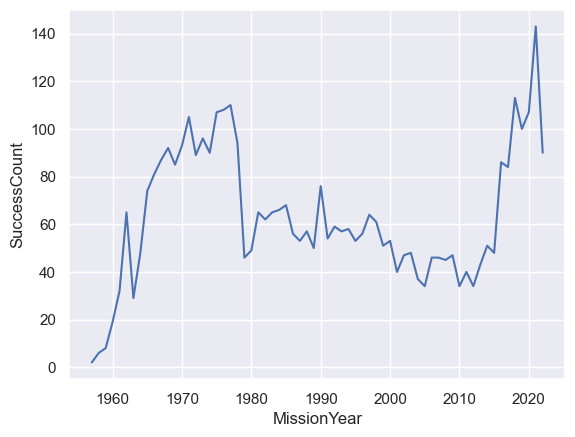

In [121]:
#plotting success count over the year
sns.lineplot(data=missiondf,x='MissionYear',y='SuccessCount')
plt.grid()

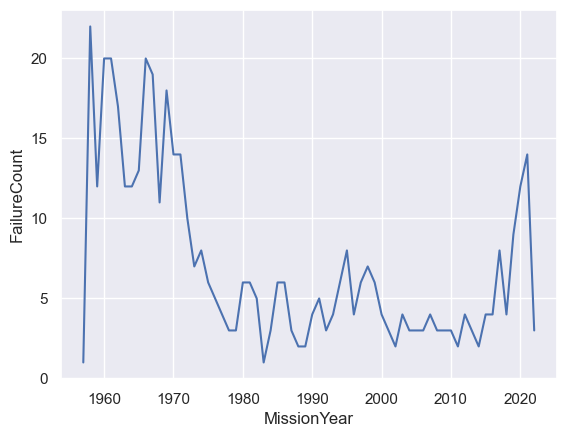

In [122]:
#plotting success count over the year
sns.lineplot(data=missiondf,x='MissionYear',y='FailureCount')
plt.grid()

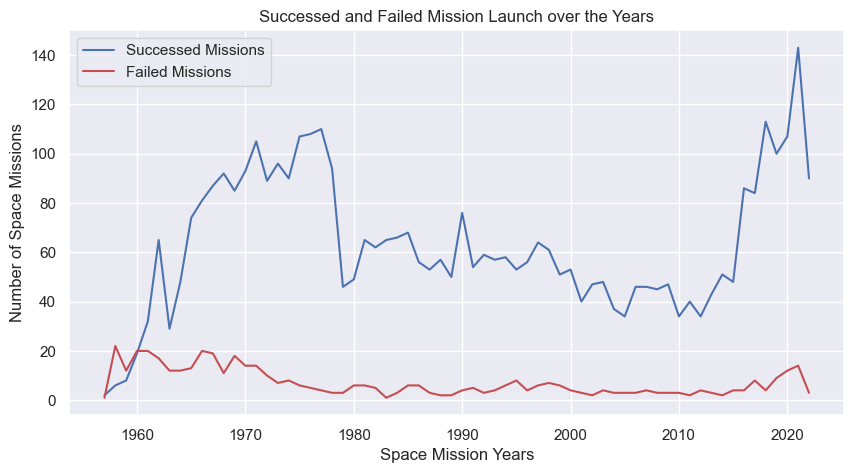

In [123]:
#setting up the figure size of the plot
plt.figure(figsize=(10,5))

#plotting successed mission counts over the year
sns.lineplot(data=missiondf,x='MissionYear',y='SuccessCount',label="Successed Missions",color='b')

#plotting Failed mission counts over the year
sns.lineplot(data=missiondf,x='MissionYear',y='FailureCount',label="Failed Missions",color='r')

plt.xlabel('Space Mission Years')
plt.ylabel('Number of Space Missions')

#title for the plot
plt.title("Successed and Failed Mission Launch over the Years")

plt.grid()
plt.show()

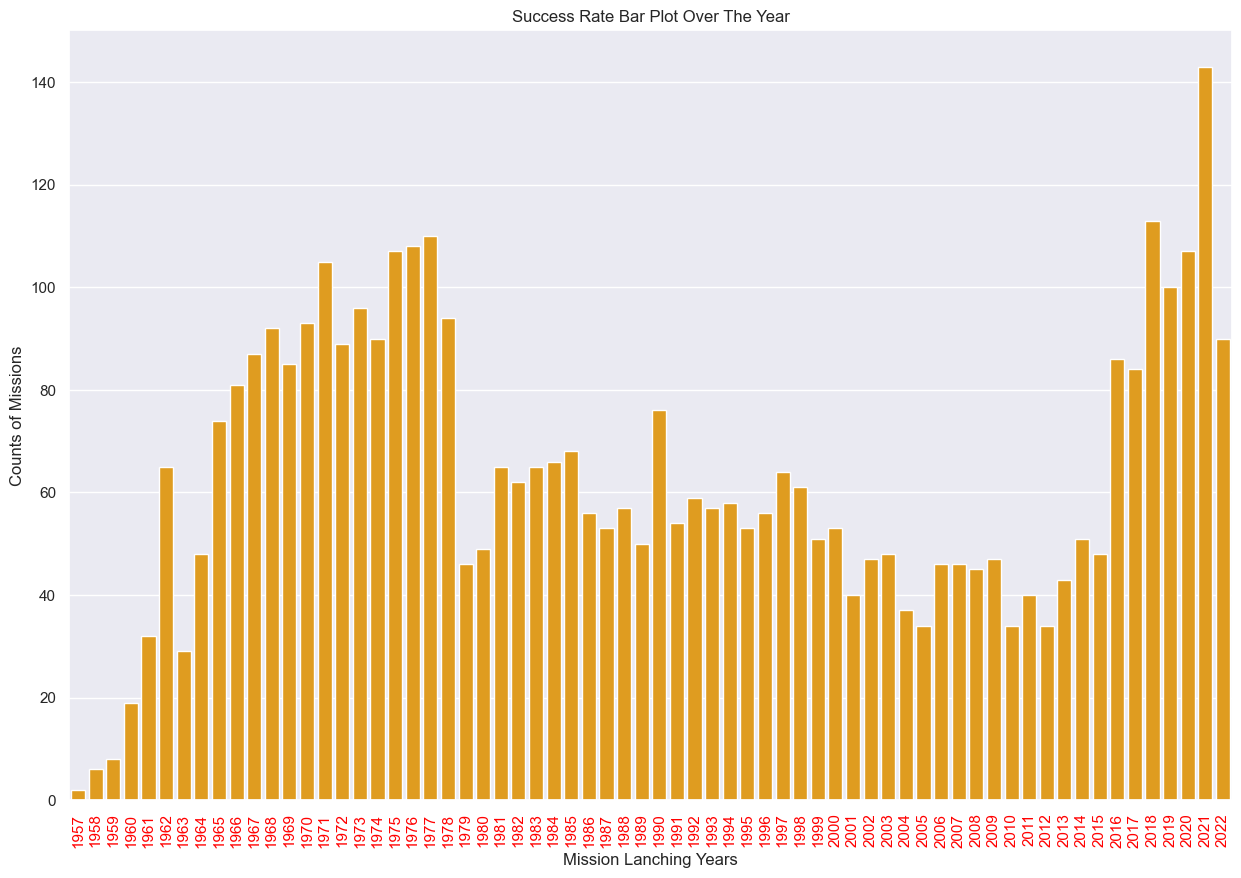

In [128]:
plt.figure(figsize=(15,10))
sns.barplot(data=missiondf,x='MissionYear',y='SuccessCount',color='Orange',legend='auto')
plt.title('Success Rate Bar Plot Over The Year')
plt.xlabel('Mission Lanching Years')
plt.ylabel('Counts of Missions')
plt.xticks(rotation=90,color='Red')
plt.grid(axis='y')
plt.show()

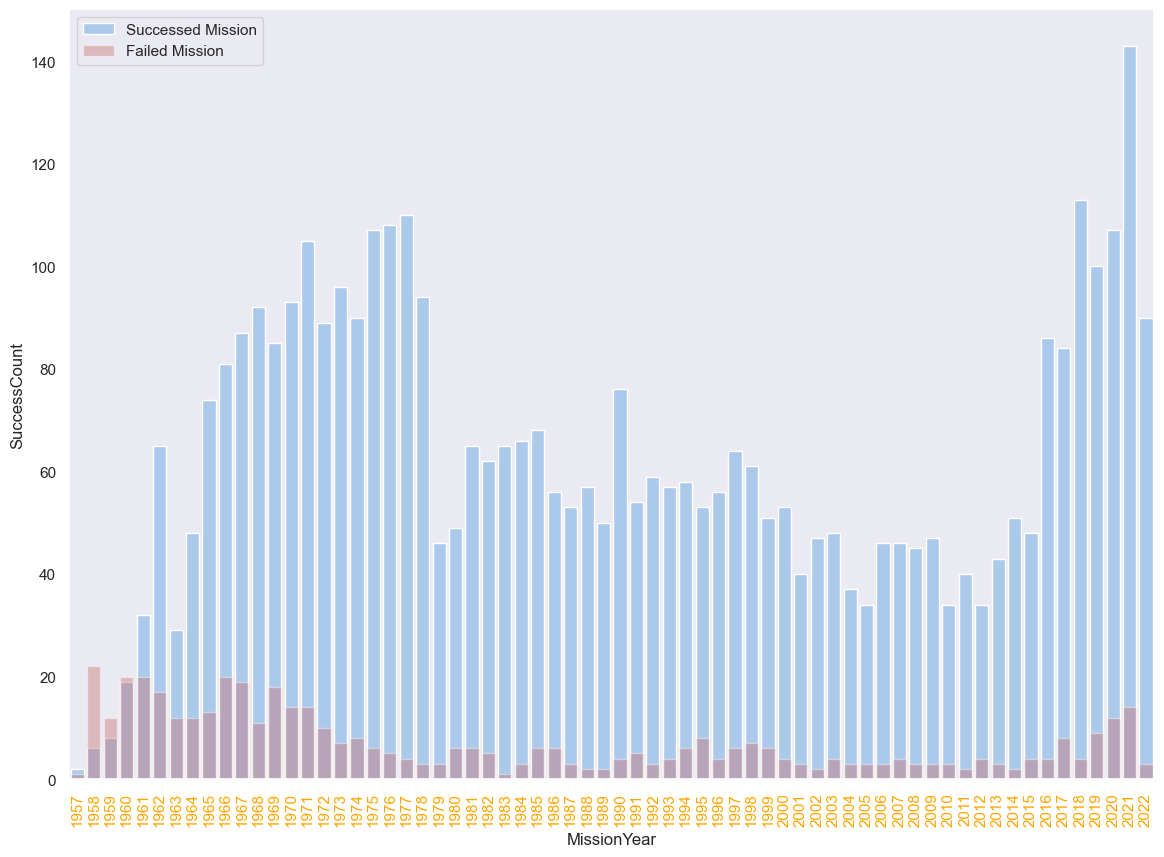

In [129]:
#initializing matplotlib figure
#f,ax = plt.figure(figsize=(6,15))
plt.figure(figsize=(14,10))

#plot the success counts
sns.set_color_codes('pastel')
sns.barplot(data=missiondf,x='MissionYear',y='SuccessCount',label='Successed Mission',color='b')

#plot the failure mission counts
sns.set_color_codes('muted')
sns.barplot(data=missiondf,x='MissionYear',y='FailureCount',label='Failed Mission',color='r',alpha=0.4)

plt.xticks(rotation=90,color='orange')
plt.show()

#ax.legend9(ncol=2,loc='upper right',frameon=True)
#ax.set()
#sns.despine(left=True,bottom=True)

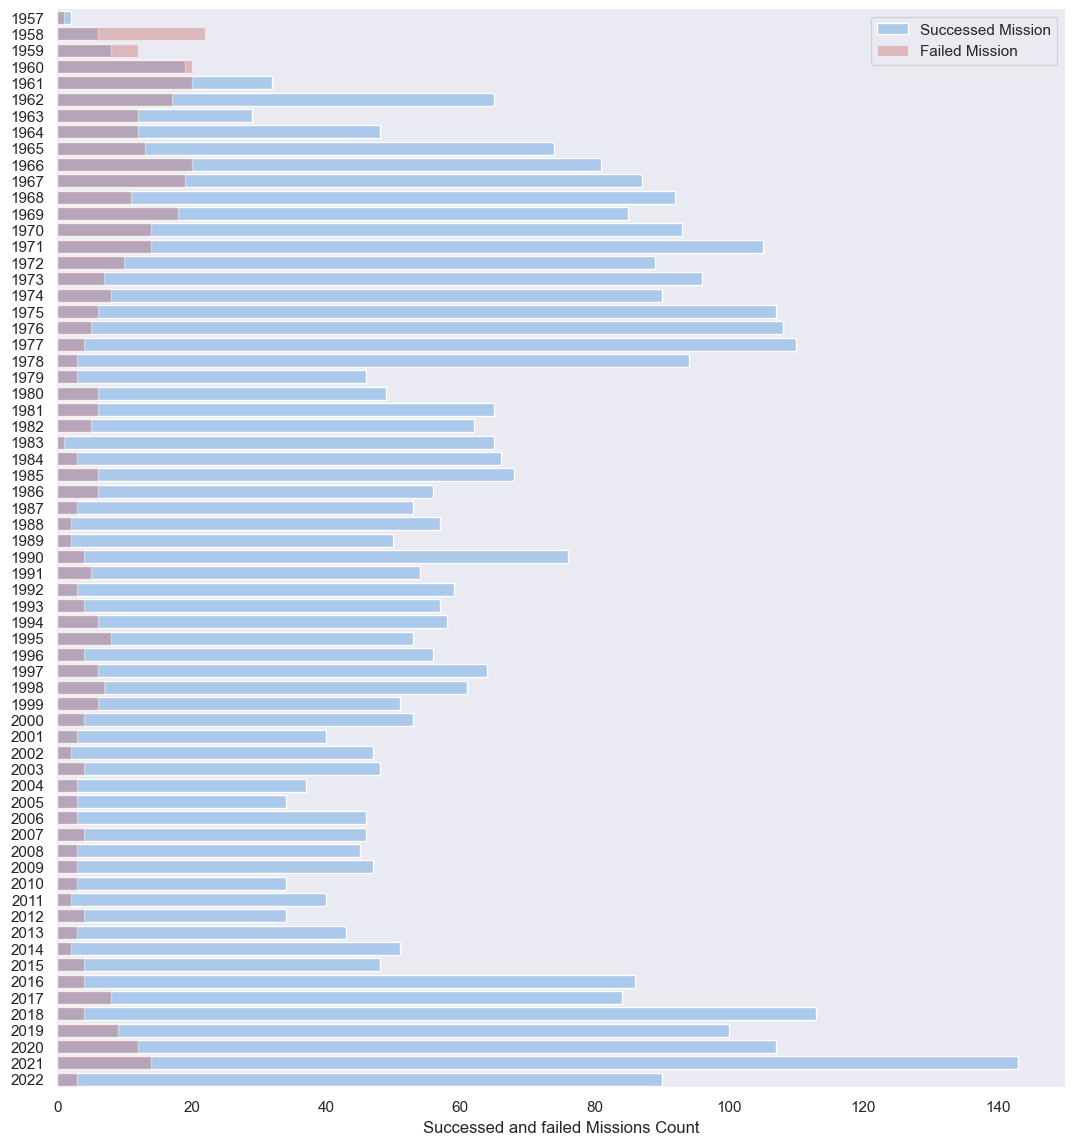

In [131]:
#initializing matplotlib figure
f, ax = plt.subplots(figsize=(13,14))
#plt.figure(figsize=(15,15))

#plot the success counts
sns.set_color_codes('pastel')
sns.barplot(data=missiondf,x='SuccessCount',y='MissionYear',label='Successed Mission',color='b',orient='h')

#plot the failure mission counts
sns.set_color_codes('muted')
sns.barplot(data=missiondf,x='FailureCount',y='MissionYear',label='Failed Mission',color='r',alpha=0.4,orient='h')

#plt.xticks(rotation=90,color='orange')

ax.legend(ncol=1,loc='upper right',frameon=True)
ax.set(xlim=(0,150),ylabel="",xlabel="Successed and failed Missions Count")
sns.despine(left=True,bottom=True)

# Q.2:Which countries have had the most successful space missions? Has it always been that way?** <a id=2></a>

In [132]:
successed_country=df[['Country','MissionStatus']]

In [133]:
successed_country

,Country,MissionStatus
0,Kazakhstan,Success
1,Kazakhstan,Success
2,USA,Failure
3,USA,Success
4,USA,Failure
...,...,...
4625,USA,Success
4626,China,Success
4627,USA,Success
4628,China,Success


In [137]:
successed_country['MissionStatus'].replace(to_replace='Partial Failure',value='Failure',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\4205253519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  successed_country['MissionStatus'].replace(to_replace='Partial Failure',value='Failure',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\4205253519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successed_country['

In [138]:
successed_country['MissionStatus'].replace(to_replace='Prelaunch Failure',value='Failure',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\3821092428.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  successed_country['MissionStatus'].replace(to_replace='Prelaunch Failure',value='Failure',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\3821092428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successed_country

In [139]:
successed_country[successed_country['MissionStatus']== 'Partial Failure']

,Country,MissionStatus


In [141]:
successed_country.groupby(['Country','MissionStatus']).value_counts()

Country                         MissionStatus
Australia                       Failure             3
                                Success             3
Barents Sea                     Failure             1
                                Success             2
Brazil                          Failure             3
China                           Failure            30
                                Success           335
France                          Failure            19
                                Success           299
Gran Canaria                    Success             2
India                           Failure            14
                                Success            68
Iran                            Failure            10
                                Success             6
Israel                          Failure             2
                                Success             9
Japan                           Failure            13
                                Succ

In [60]:
successed_country

,MissionStatus
Country,
Australia,3
Barents Sea,2
China,335
France,299
Gran Canaria,2
India,68
Iran,6
Israel,9
Japan,117


In [61]:
successed_country.rename(columns={'MissionStatus':'Successed Missions'},inplace=True)

In [62]:
successed_country.sort_values(by='Successed Missions',ascending=False,inplace=True)

In [63]:
successed_country

,Successed Missions
Country,
Russia,1323
USA,1298
Kazakhstan,625
China,335
France,299
Japan,117
India,68
Pacific Ocean,33
New Zealand,25


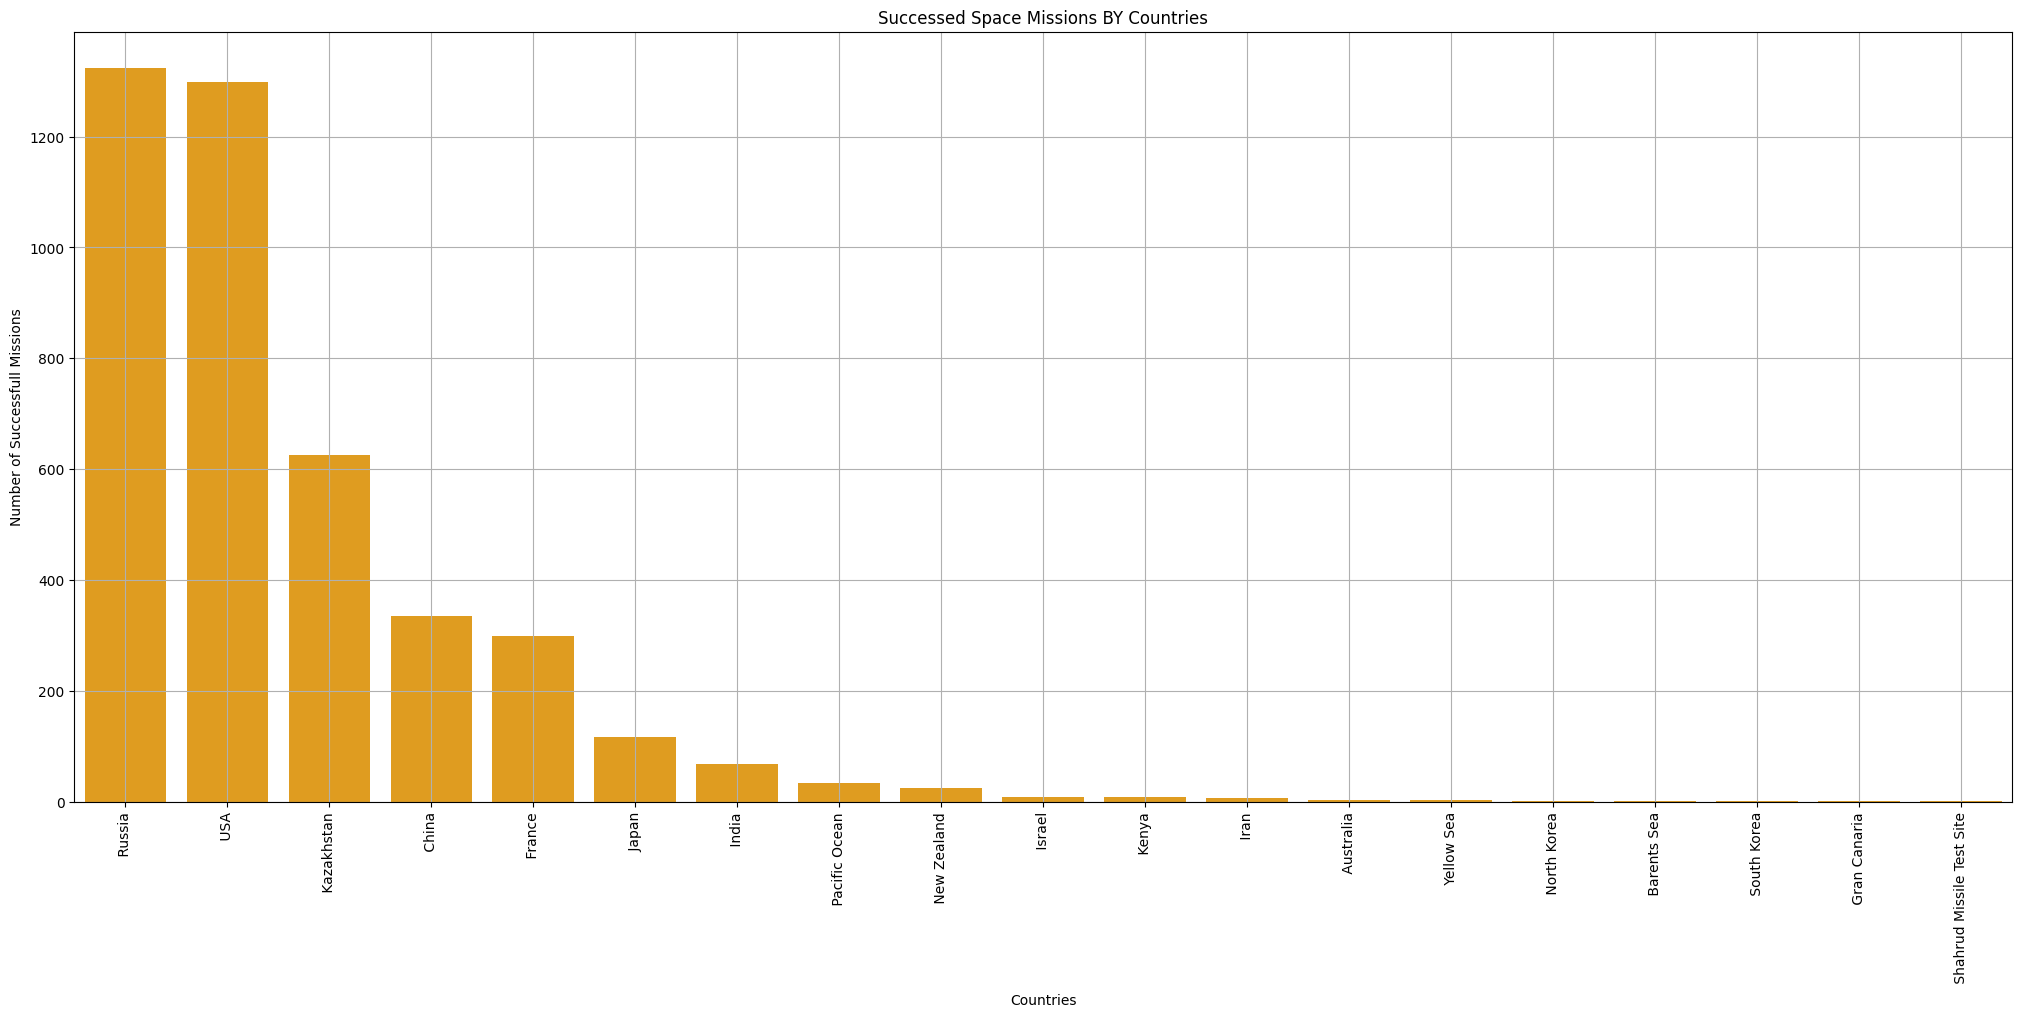

In [70]:
plt.figure(figsize=(25,10))
sns.barplot(data=successed_country,x=successed_country.index,y='Successed Missions',color='orange')
plt.title('Successed Space Missions BY Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Successfull Missions')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Q.3:Which rocket has been used for the most space missions? Is it still active? <a id=3></a>

In [101]:
rockets=df[['Rocket','RocketStatus']]

In [102]:
rockets=rockets.groupby(['Rocket']).value_counts()

In [104]:
rockets=pd.DataFrame(rockets)

In [105]:
rockets.sort_values(by='count')

,,count
Rocket,RocketStatus,
Zoljanah,Active,1
Delta II 7920H,Retired,1
Delta II 7920-8,Retired,1
Delta II 7920-10L,Retired,1
Delta II 7426,Retired,1
...,...,...
Soyuz U,Retired,125
Cosmos-2I (63SM),Retired,126
Molniya-M /Block ML,Retired,128


In [107]:
rockets.rename(columns={'count' : 'Total Missions'},inplace=True)

In [109]:
rockets.sort_values(by='Total Missions',ascending=False,inplace=True)

In [111]:
rockets.reset_index(inplace=True)

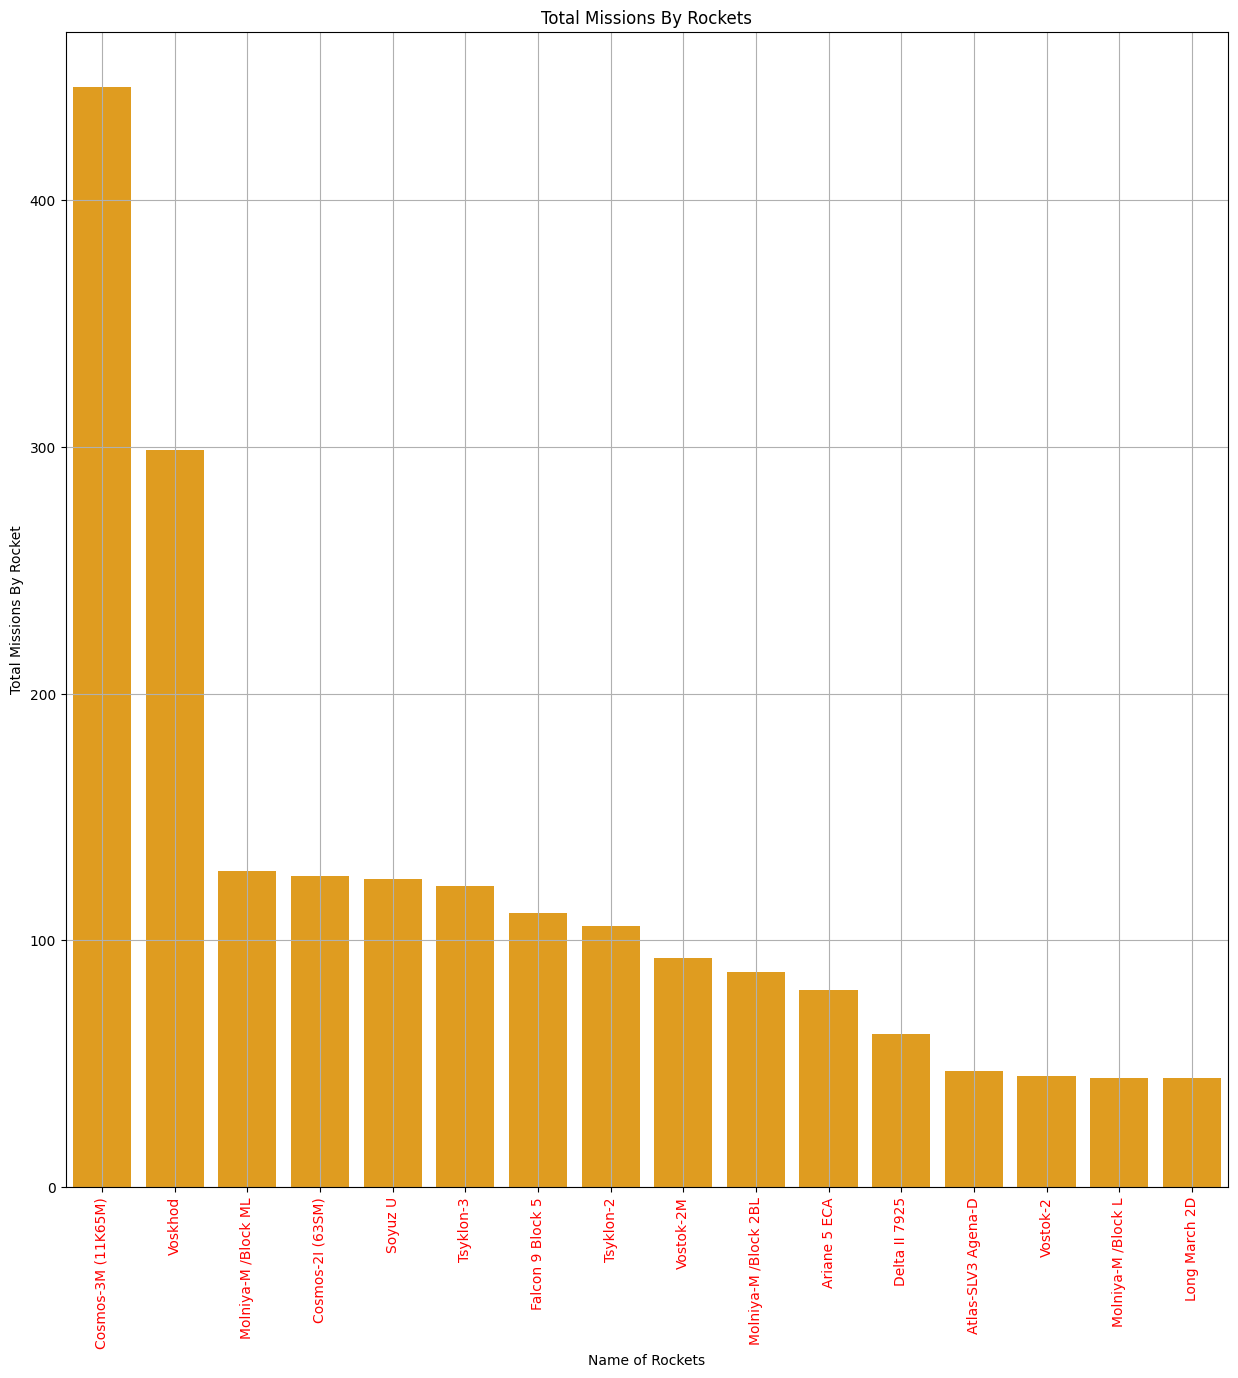

In [119]:
plt.figure(figsize=(15,15))
plt.xlabel('Name of Rockets')
sns.barplot(data=rockets.head(16),x='Rocket',y='Total Missions',color='orange')
plt.xlabel('Name of Rockets')
plt.ylabel('Total Missions By Rocket')
plt.xticks(rotation=90,color='red')
plt.title('Total Missions By Rockets')
plt.grid()
plt.show()

In [121]:
rockets[rockets['RocketStatus']=='Retired']

,index,Rocket,RocketStatus,Total Missions
0,84,Cosmos-3M (11K65M),Retired,446
1,357,Voskhod,Retired,299
2,210,Molniya-M /Block ML,Retired,128
3,82,Cosmos-2I (63SM),Retired,126
4,299,Soyuz U,Retired,125
...,...,...,...,...
364,249,Redstone Sparta,Retired,1
365,126,Energiya/Polyus,Retired,1
366,125,Energiya/Buran,Retired,1
367,79,Conestoga-1620,Retired,1


In [122]:
rockets[rockets['RocketStatus']=='Active']

,index,Rocket,RocketStatus,Total Missions
6,135,Falcon 9 Block 5,Active,111
10,19,Ariane 5 ECA,Active,80
15,175,Long March 2D,Active,44
16,171,Long March 2C,Active,43
18,184,Long March 3B/E,Active,41
...,...,...,...,...
347,122,Electron,Active,1
359,312,Super Stripy,Active,1
360,245,Proton-M,Active,1
363,127,Epsilon,Active,1


# Q.4: Are there any patterns you can notice with the launch locations? <a id=3></a>

In [21]:
location=df[['Location','MissionStatus']]

In [25]:
location['Location'].value_counts()

Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan               251
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   211
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Pad A, Boca Chica, Texas, USA                              1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Launch Plateform, Shahrud Missile Test Site                1
K-84 Submarine, Barents Sea Launch Area, Barents Sea       1
LC-9A, Taiyuan Satellite Launch Center, China              1
Name: count, Length: 158, dtype: int64

In [26]:
location.groupby(['Location']).value_counts()

Location                                                 MissionStatus  
Blue Origin Launch Site, West Texas, Texas, USA          Success            12
Brigitte, Hammaguir, Algeria, France                     Success             3
                                                         Partial Failure     1
Cosmic Girl, Mojave Air and Space Port, California, USA  Success             4
                                                         Failure             1
                                                                            ..
VMS Eve, Spaceport America, New Mexico, USA              Success             2
                                                         Partial Failure     1
Vertical Launch Area, Spaceport America, New Mexico      Partial Failure     3
                                                         Failure             1
Xichang Satellite Launch Center, China                   Success             2
Name: count, Length: 298, dtype: int64

In [27]:
successed=location[location['MissionStatus'] == 'Success']

In [32]:
successed=successed.groupby('Location').value_counts()

In [34]:
successed=pd.DataFrame(successed)

In [40]:
successed.sort_values(by='count',ascending=False,inplace=True)

In [42]:
successed.reset_index(inplace=True)

In [45]:
successed.rename(columns={'count':'TotalSuccessMissions'},inplace=True)

In [47]:
successed['TotalSuccessMissions'].sum()

4162

In [51]:
partial_fail=location[location['MissionStatus'] == 'Partial Failure']

In [55]:
partial_fail=partial_fail.groupby('Location').value_counts()

In [57]:
partial_fail=pd.DataFrame(partial_fail)

In [59]:
partial_fail['count'].sum()

147

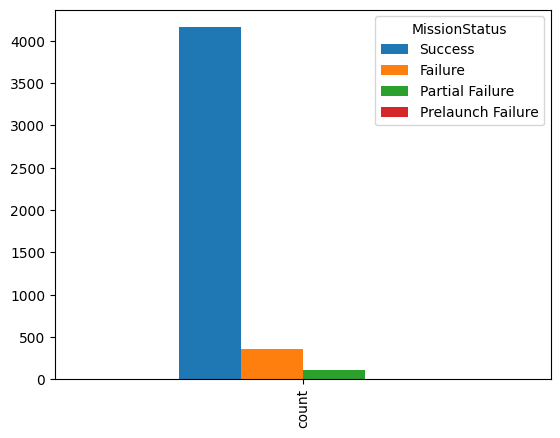

In [32]:
counts.transpose().plot(kind='bar',stacked=False)
plt.show()